In [5]:
#NumPy is a basic level external library in Python used for complex mathematical operations
import numpy as np
#pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language
import pandas as pd
#A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns
from pandas import DataFrame
#matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
#statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models
from statsmodels.formula.api import ols

In [6]:
# loading dataset
#. is used to call the function of its type
data = pd.read_csv('data.csv')
# view first few rows
data.head(5)

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


In [7]:
#set the figure size to the given x and y
plt.rcParams['figure.figsize']=(20.0,10.0)
#returns no of rows and columns
print(data.shape)

(91, 4)


In [8]:
#loading all the price values to x
x=data['Price'].values
#loading all the Quantity values to y
y=data['Quantity'].values

In [9]:
#finding the mean of x values
mean_x=np.mean(x)
#finding the mean of y values
mean_y=np.mean(y)

In [10]:
#storing the length of the vlues of the given data
n=len(x)

In [11]:
#intitializing the required variables numer and denom of slope
numer=0
denom=0
#for loop to find the slope value of the best fit line
for i in range(n):
#numerators and denominators for the slope updating
  numer += (x[i]-mean_x)*(y[i]-mean_y)
  denom += (x[i]-mean_x)**2
#finding the slope
m=numer/denom
#finding the y_intercept of the best line
c=mean_y-(m*mean_x)
print(c)

30.051485828783257


In [12]:
#limits for the x
max_x=np.max(x)+100
min_x=np.min(x)-100

In [13]:
#storing all the x values of given number
x=np.linspace(min_x,max_x,1000)
#finding y for the x
y=c+m*x

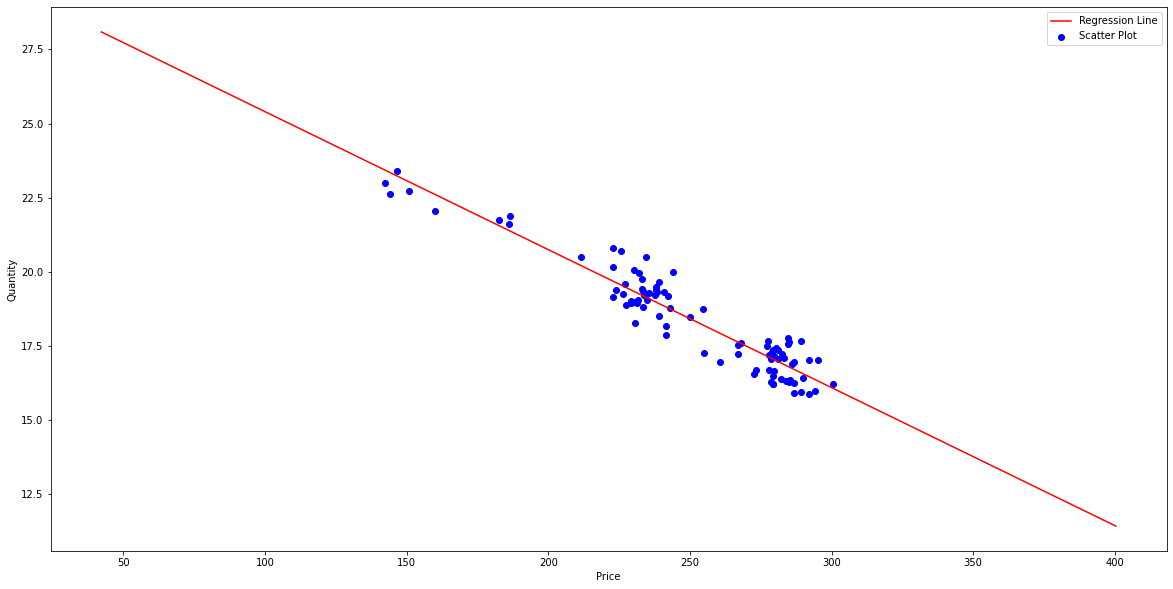

In [14]:
#plotting the best fit line
plt.plot(x,y,color='red',label='Regression Line')
#plotting the scatter plot of the x and y
plt.scatter(data['Price'],data['Quantity'],color='blue',label='Scatter Plot',marker='o')
#labeling the axis x and y
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend()
#to display the graph
plt.show()

In [16]:
#to get root mean squared error
#initializing all the required variables with required values
x=data['Price'].values
y=data['Quantity'].values
n=len(x)
rmse=0
#for loop to get root mean squared error
for i in range(n):
  y_pred=c+m*x[i]
  rmse += (y[i]-y_pred)**2
rmse=np.sqrt(rmse/n)
print(rmse)

0.5670175020351357


In [ ]:
#this is to get r2 value
#initialaizing all the required variables
ss_tot = 0
ss_res =0
#for loop to find r2 error
for i in range(n):
  y_pred=c+m*x[i]
  ss_tot +=(y[i]-mean_y)**2
  ss_res +=(y[i]-y_pred)**2
r2=1-(ss_res/ss_tot)
print(r2)

0.9011374621660582


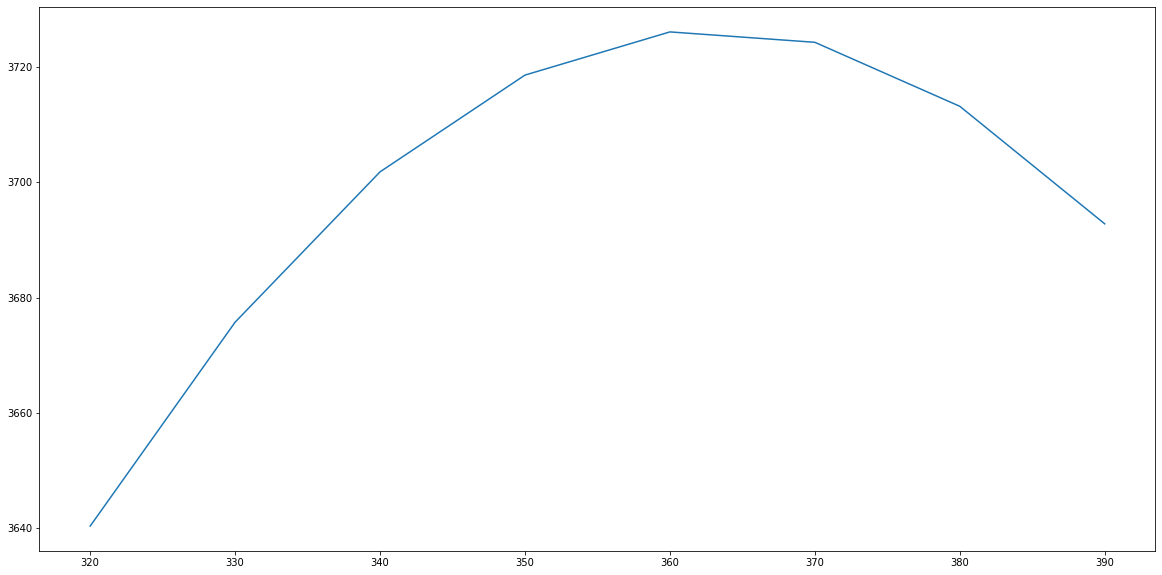

In [ ]:
#giving the price values to predict the best with high revenue
Price = [320, 330, 340, 350, 360, 370, 380, 390]
#giving the cost of the product 
cost = 80
#list to update all the revenues for different prices
Revenue = []
#for loop to update all the revenues
for i in Price:
  #finding the quantity from trained model by giving the price
   quantity_demanded = c + m * i 
  #appending the revenue values by applying revenue formulae
   Revenue.append((i-cost) * quantity_demanded)
#storing the revenue and corresponding price in the data frame
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plotting the graph of price and revenue
plt.plot(profit["Price"], profit["Revenue"])


In [ ]:
#finding the maximum revenue giving price
profit[profit['Revenue'] == profit['Revenue'].max()]

,Price,Revenue
4,360,3726.12794


#Inbuilt Method To apply ols method

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


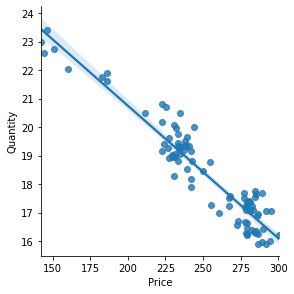

In [17]:
# Inbuilt python  graph method that draws the best fit line in the data
sns.lmplot(x = "Price", y = "Quantity", data = data, size = 4)

In [ ]:
# fit OLS model
model = ols("Quantity ~ Price", data = data).fit()
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Thu, 20 May 2021   Prob (F-statistic):           1.69e-46
Time:                        07:53:08   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

In [ ]:
# plugging regression coefficients
quantity = 30.05 - 0.0465  # eq (5)
# the profit function in eq (3) becomes
profit = (30.05 - 0.0465 )  # eq (6)

[3640.8, 3676.25, 3702.4, 3719.2500000000005, 3726.8000000000006, 3725.0500000000006, 3714.000000000001, 3693.6499999999996]


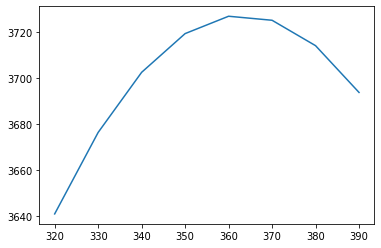

In [ ]:
# a range of diffferent prices to find the optimum one
Price = [320, 330, 340, 350, 360, 370, 380, 390]
# assuming a fixed cost
cost = 80
Revenue = []
for i in Price:
   quantity_demanded = 30.05 - 0.0465 * i
   
   # profit function
   Revenue.append((i-cost) * quantity_demanded)
# create data frame of price and revenue
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price
plt.plot(profit["Price"], profit["Revenue"])


In [ ]:
# price at which revenue is maximum
profit[profit['Revenue'] == profit['Revenue'].max()]

,Price,Revenue
4,360,3726.8
